
# <font color='#003366'>**STARTUP DATASET ANALYSIS- EDA Project**</font>

# <font color='#4747d4'>**Introduction**</font>


*   India's economy is among the fastest-growing globally, fostering the rise of numerous innovative startups. These startups are attracting substantial funding, reflecting strong investor interest.
*   In this analysis, we will examine data on Indian startup funding to gain deeper insights into this dynamic ecosystem and track its evolution over time.




# <font color='#4747d4'>**Objectives**</font>
*   How Does the Funding Ecosystem changes with respect to Time?
*   What is the General Amount that Startups get in India?
*   Does Location also play a role, In determining the Growth of a Startup?
*   Which Kind of Industries are more preferred for Startups?
*   Who plays the main role in Indian Startups Ecosystem?
*   What are the different Types of Funding for Startups?








# <font color='#4747d4'>**About the Datasets**</font>
**Dataset:** 'startup_funding.csv'

**Content:** This dataset contains information about funding provided to startups in India.

**Rows:** 3044

**Columns:** 10

INPUT:

- `Sr No` - Serial number for each entry
- `Date dd/mm/yyyy` - The date when the funding was provided, in the format dd/mm/yyyy
- `Startup Name` - The name of the startup that received funding
- `Industry Vertical` - The industry or sector in which the startup operates, such as technology, healthcare, e-commerce, etc.
- `SubVertical` - A more specific category within the industry, providing additional details about the startup's focus
- `City  Location` - The city or location where the startup is based
- `Investors Name` - The names of the investors or venture capital firms that provided the funding
- `InvestmentnType` - The type of investment, such as Seed Funding, Series A, Series B, etc.
- `Amount in USD` - The amount of funding received by the startup, typically expressed in US dollars
- `Remarks` - Any additional remarks or notes about the funding round or the startup

# <font color='#20a7db'>**Exploratory Data Analysis (EDA)**</font>
I have divided my tasks into 4 sections:
1. Data Reading & Cleaning
2. Understanding the Data
3. Clean and Prepare Data
4. Data Visualization

# **Data Reading & Cleaning**

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
df = pd.read_csv('startup_funding.csv')
startup = df.copy()

# **Understanding the Data**

In [3]:
startup.head(3)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN


In [4]:
# (rows, columns)
startup.shape

(3044, 10)

In [5]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [6]:
startup.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [7]:
startup.dtypes

,0
Sr No,int64
Date dd/mm/yyyy,object
Startup Name,object
Industry Vertical,object
SubVertical,object
City Location,object
Investors Name,object
InvestmentnType,object
Amount in USD,object
Remarks,object


In [9]:
startup.describe().T

,count,mean,std,min,25%,50%,75%,max
Sr No,3044.0,1522.5,878.871435,1.0,761.75,1522.5,2283.25,3044.0


In [10]:
startup.duplicated().sum()

0

# **Clean and Prepare the Data**

Rename and drop the Columns

In [11]:
startup.drop(columns=['Remarks'],inplace=True)

In [12]:
# Rename columns
startup.rename(columns={
    "Sr No": "sr_No",
    "Date dd/mm/yyyy": "date",
    "Startup Name": "startup_name",
    "Industry Vertical": "industry_vertical",
    "SubVertical": "sub_vertical",
    "City  Location": "city_location",
    "Investors Name": "undisclosed_investor",
    "InvestmentnType": "investment_type",
    "Amount in USD": "amount_USD",
}, inplace=True)

In [13]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sr_No                 3044 non-null   int64 
 1   date                  3044 non-null   object
 2   startup_name          3044 non-null   object
 3   industry_vertical     2873 non-null   object
 4   sub_vertical          2108 non-null   object
 5   city_location         2864 non-null   object
 6   undisclosed_investor  3020 non-null   object
 7   investment_type       3040 non-null   object
 8   amount_USD            2084 non-null   object
dtypes: int64(1), object(8)
memory usage: 214.2+ KB


Date-Time Transformations

In [14]:
# Fix the values in the date column

startup['date'][startup['date']=='01/07/015'] = '01/07/2015'
startup['date'][startup['date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'
startup['date'][startup['date']=='12/05.2015'] = '12/05/2015'
startup['date'][startup['date']=='13/04.2015'] = '13/04/2015'
startup['date'][startup['date']=='15/01.2015'] = '15/01/2015'
startup['date'][startup['date']=='22/01//2015'] = '22/01/2015'
startup['date'][startup['date']=='05/072018'] = '05/07/2018'


# Convert date column to datetime format
startup['date'] = pd.to_datetime(startup['date'], format='%d/%m/%Y')

# Extract year and month from date(float)
startup['year'] = startup['date'].dt.year.astype(int)
startup['month'] = startup['date'].dt.month.astype(int)

In [15]:
min_year = startup['year'].min()
max_year = startup['year'].max()

min_month = startup[startup['year'] == min_year]['month'].min()
max_month = startup[startup['year'] == max_year]['month'].max()

min_year_month = (min_year, min_month)
max_year_month = (max_year, max_month)

print("Minimum year-month:", min_year_month)
print("Maximum year-month:", max_year_month)

# The data is available from January 2015 till January 2020

Minimum year-month: (2015, 1)
Maximum year-month: (2020, 1)


In [16]:
startup.sample(3)

,sr_No,date,startup_name,industry_vertical,sub_vertical,city_location,undisclosed_investor,investment_type,amount_USD,year,month
2426,2427,2015-09-17,Paintcollar,Designer Merchandize Marketplace,NaN,Mumbai,Applyifi,Seed Funding,NaN,2015,9
1434,1435,2016-08-10,Bombay Shaving Company,eCommerce,Men\\xe2\\x80\\x99s Grooming Product etailer,New Delhi,"Noshir Kaka, Subramanian Ramadorai, Kiran Desh...",Seed Funding,"6,00,000",2016,8
2793,2794,2015-05-21,SunTerrace,Rooftop Solar Plants,NaN,New Delhi,Sunergy Investors,Private Equity,NaN,2015,5


Handling Missing and Incorrect Values

In [17]:
# Missing volues percentage:

(startup.isnull().sum() / startup.shape[0] * 100).sort_values(ascending = False).round(2).astype(str) + ' %'

,0
amount_USD,31.54 %
sub_vertical,30.75 %
city_location,5.91 %
industry_vertical,5.62 %
undisclosed_investor,0.79 %
investment_type,0.13 %
sr_No,0.0 %
date,0.0 %
startup_name,0.0 %
year,0.0 %


`Amount_USD`

In [18]:
startup['amount_USD'].unique()

array(['20,00,00,000', '80,48,394', '1,83,58,860', '30,00,000',
       '18,00,000', '90,00,000', '15,00,00,000', '60,00,000',
       '7,00,00,000', '5,00,00,000', '2,00,00,000', '1,20,00,000',
       '3,00,00,000', '59,00,000', '20,00,000', '23,10,00,000',
       '4,86,000', '15,00,000', 'undisclosed', '2,60,00,000',
       '1,74,11,265', '13,00,000', '13,50,00,000', '3,00,000',
       '22,00,00,000', '1,58,00,000', '28,30,00,000', '1,00,00,00,000',
       '4,50,00,000', '58,50,00,000', 'unknown', '45,00,000', '33,00,000',
       '50,00,000', '1,80,00,000', '10,00,000', '1,00,00,000',
       '45,00,00,000', '16,00,000', '14,00,00,000', '3,80,80,000',
       '12,50,00,000', '1,10,00,000', '5,10,00,000', '3,70,00,000',
       '5,00,000', '11,00,00,000', '1,50,00,000', '65,90,000',
       'Undisclosed', '3,90,00,00,000', '1,90,00,000', '25,00,000',
       '1,45,000', '6,00,00,000', '1,60,00,000', '57,50,000', '3,19,605',
       '48,89,975.54', '7,50,00,000', '27,39,034.68', '1,51,09,500.0

In [19]:
# Replace commas(,) in the 'amount_USD' column
startup['amount_USD'] = startup['amount_USD'].apply(lambda x: str(x).replace(',', ''))


# Correct invalid values in the 'amount_USD' column
startup['amount_USD'] = startup['amount_USD'].apply(lambda x : str(x).replace("undisclosed", "0"))
startup['amount_USD'] = startup['amount_USD'].apply(lambda x : str(x).replace("Undisclosed", "0"))
startup['amount_USD'] = startup['amount_USD'].apply(lambda x : str(x).replace("unknown", "0"))
startup['amount_USD'] = startup['amount_USD'].apply(lambda x : str(x).replace("14342000+", "0"))
startup['amount_USD'] = startup['amount_USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa010000000", "0"))
startup['amount_USD'] = startup['amount_USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa05000000", "0"))
startup['amount_USD'] = startup['amount_USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa019350000", "0"))
startup['amount_USD'] = startup['amount_USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0600000", "0"))
startup['amount_USD'] = startup['amount_USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa020000000", "0"))
startup['amount_USD'] = startup['amount_USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0N/A", "0"))
startup['amount_USD'] = startup['amount_USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa016200000", "0"))
startup['amount_USD'] = startup['amount_USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0685000", "0"))
startup['amount_USD'] = startup['amount_USD'].apply(lambda x : str(x).replace("nan", "0"))

In [21]:
# Convert to numeric
startup['amount_USD'] = pd.to_numeric(startup['amount_USD'], errors='coerce')

# Replace 0 values in 'amount_USD' with NaN
startup['amount_USD'] = startup['amount_USD'].replace(0, np.nan)

# Replace NaN values with the mean
startup['amount_USD'].fillna(startup['amount_USD'].mean(), inplace=True)

In [23]:
# 'Amount in USD' normalization

startup['amount_USD'].value_counts(normalize = True).head(10).mul(100).round(2).astype(str) + ' %'

,proportion
amount_USD,
1.842990e+07,32.16 %
1.000000e+06,5.45 %
5.000000e+05,3.55 %
2.000000e+06,2.27 %
3.000000e+06,2.17 %
5.000000e+06,2.17 %
1.000000e+07,1.97 %
1.000000e+05,1.87 %
1.500000e+05,1.48 %


In [24]:
# Set pandas option to display numbers in standard notation
pd.options.display.float_format = '{:,.2f}'.format

In [25]:
# just checking
startup.sample(2)

,sr_No,date,startup_name,industry_vertical,sub_vertical,city_location,undisclosed_investor,investment_type,amount_USD,year,month
2456,2457,2015-09-25,TravelKhana,online meal-booking platform for train travelers,NaN,New Delhi,Astarc Ventures & Others,Seed Funding,"18,429,897.27",2015,9
2419,2420,2015-09-15,Tea Trails,Chain of Tea Caf\\xc3\\xa9\\xe2\\x80\\x99s,NaN,Mumbai,"Anil Matai, Vikram Tandon, Shyam Sundar R & ot...",Seed Funding,"1,000,000.00",2015,9


`City_Location`


In [27]:
startup['city_location'].unique()

array(['Bengaluru', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Delhi', 'Kormangala', 'Tulangan', 'Hyderabad', 'Burnsville',
       'Menlo Park', 'Gurugram', 'Palo Alto', 'Santa Monica', 'Singapore',
       'Taramani', 'Andheri', 'Chembur', 'Nairobi', 'Haryana', 'New York',
       'Karnataka', 'Mumbai/Bengaluru', 'Bhopal',
       'Bengaluru and Gurugram', 'India/Singapore', 'Jaipur', 'India/US',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'California', 'India',
       'Ahemadabad', 'Rourkela', 'Srinagar', 'Bhubneswar', 'Chandigarh',
       'Delhi & Cambridge', 'Kolkatta', 'Kolkata', 'Coimbatore',
       'Bangalore', 'Udaipur', nan, 'Ahemdabad', 'Bhubaneswar',
       'Ahmedabad', 'Surat', 'Goa', 'Uttar Pradesh', 'Nw Delhi', 'Gaya',
       'Vadodara', 'Trivandrum', 'Missourie', 'Panaji', 'Gwalior',
       'Karur', 'Udupi', 'Kochi', 'Agra', 'Bangalore/ Bangkok', 'Hubli',
       'Kerala', 'Kozhiko

In [29]:
startup['city_location']=startup['city_location'].str.replace('\\\\xc2\\\\xa0Noida','Noida')
startup['city_location']=startup['city_location'].str.replace('\\\\xc2\\\\xa0Bangalore','Bangalore')
startup['city_location']=startup['city_location'].str.replace('\\\\xc2\\\\xa0Gurgaon','Gurgaon')
startup['city_location']=startup['city_location'].str.replace('\\\\xc2\\\\xa0New Delhi','New Delhi')
startup['city_location']=startup['city_location'].str.replace('\\\\xc2\\\\xa0Mumbai','Mumbai')
startup['city_location']=startup['city_location'].str.replace('Seattle / Bangalore','Bangalore')
startup.loc[startup['city_location'] == 'Bengaluru', 'city_location'] = 'Bangalore'

In [30]:
startup.loc[startup['city_location'] == 'Bangalore'].sample(3)

,sr_No,date,startup_name,industry_vertical,sub_vertical,city_location,undisclosed_investor,investment_type,amount_USD,year,month
570,571,2017-10-28,Ola Cabs,Consumer Internet,App based cab hailing services,Bangalore,ANI Technologies Pvt. Ltd,Private Equity,"7,700,000.00",2017,10
22,23,2019-11-15,Ninjacart,B2B Marketing,Agritech,Bangalore,Trifecta Capital Advisors,Debt Funding,"26,000,000.00",2019,11
1081,1082,2017-01-19,PParke,Consumer Internet,Parking Solutions mobile app,Bangalore,SB Ventures,Seed Funding,"18,429,897.27",2017,1


`Undisclosed_Investors`

In [31]:
# Replace the name 'Undisclosed investors' in the 'investors_name' column with 'Undisclosed Investors'

startup.loc[startup['undisclosed_investor'] == 'Undisclosed investors', 'undisclosed_investor'] = 'Undisclosed Investors'
startup.loc[startup['undisclosed_investor'] == 'Undisclosed Investor', 'undisclosed_investor'] = 'Undisclosed Investors'
startup.loc[startup['undisclosed_investor'] == 'undisclosed investors', 'undisclosed_investor'] = 'Undisclosed Investors'
startup.loc[startup['undisclosed_investor'] == 'undisclosed investor', 'undisclosed_investor'] = 'Undisclosed Investors'
startup.loc[startup['undisclosed_investor'] == 'Undisclosed', 'undisclosed_investor'] = 'Undisclosed Investors'

In [32]:
startup[startup['undisclosed_investor'] == 'Undisclosed Investors'].shape

(106, 11)

In [33]:
startup.sample(2)

,sr_No,date,startup_name,industry_vertical,sub_vertical,city_location,undisclosed_investor,investment_type,amount_USD,year,month
1935,1936,2016-02-09,Inc42,Consumer Internet,Startup Focused Media News Portal,New Delhi,"India Ventures, Aarin Capital & Others",Seed Funding,"18,429,897.27",2016,2
175,176,2018-08-09,Happy EMI,Fin-Tech,Consumer Financing Platform,Bangalore,AJ Ventures and Jain International Trade Organ...,Seed/ Angel Funding,"1,000,000.00",2018,8


`Industry_vertical`

In [34]:
startup['industry_vertical'].unique()

array(['E-Tech', 'Transportation', 'E-commerce', 'FinTech',
       'Fashion and Apparel', 'Logistics', 'Hospitality', 'Technology',
       'E-Commerce', 'Aerospace', 'B2B-focused foodtech startup',
       'Finance', 'Video', 'Gaming', 'Software', 'Health and wellness',
       'Education', 'Food and Beverage', 'Health and Wellness',
       'B2B Marketing', 'Video Games', 'SaaS', 'Last Mile Transportation',
       'Healthcare', 'Customer Service', 'B2B', 'Consumer Goods',
       'Advertising, Marketing', 'IoT', 'Information Technology',
       'Consumer Technology', 'Accounting', 'Retail',
       'Customer Service Platform', 'Automotive', 'EdTech', 'Services',
       'Compliance', 'Transport', 'Artificial Intelligence', 'Tech',
       'Health Care', 'Luxury Label', 'Waste Management Service',
       'Deep-Tech', 'Agriculture', 'Energy', 'Digital Media', 'Saas',
       'Automobile', 'Agtech', 'Social Media', 'Fintech', 'Edtech', 'AI',
       'Ecommerce', 'Nanotechnology', 'Services Platfo

In [36]:
startup['industry_vertical']=startup['industry_vertical'].str.replace('Health and wellness','healthcare')
startup['industry_vertical']=startup['industry_vertical'].str.replace('Health and Wellness','healthcare')
startup['industry_vertical']=startup['industry_vertical'].str.replace('Healthcare','healthcare')
startup['industry_vertical']=startup['industry_vertical'].str.replace('Health Care','healthcare')
startup['industry_vertical']=startup['industry_vertical'].str.replace('E-Commerce','E-commerce')
startup['industry_vertical']=startup['industry_vertical'].str.replace('Ecommerce','E-commerce')
startup['industry_vertical']=startup['industry_vertical'].str.replace('ECommerce','E-commerce')
startup['industry_vertical']=startup['industry_vertical'].str.replace('eCommerce','E-commerce')
startup['industry_vertical']=startup['industry_vertical'].str.replace('eCommece','E-commerce')

In [39]:
startup.loc[startup['industry_vertical'] == 'E-commerce'].shape

(297, 11)

In [40]:
startup.loc[startup['industry_vertical'] == 'healthcare'].shape

(79, 11)

`Investment_type`

In [41]:
# Replace less common terms with more widely used terms in 'investment_type' column
startup.loc[startup['investment_type'] == 'Seed/ Angel Funding', 'investment_type'] = 'Seed / Angel Funding'
startup.loc[startup['investment_type'] == 'Seed\nFunding',      'investment_type'] = 'Seed Funding'
startup.loc[startup['investment_type'] == 'Seed/Angel Funding',  'investment_type'] = 'Seed / Angel Funding'
startup.loc[startup['investment_type'] == 'Angel / Seed Funding','investment_type'] = 'Seed / Angel Funding'

In [42]:
startup['investment_type'] = startup['investment_type'].replace('Seed\nFunding', 'Seed Funding', regex=True)

In [43]:
startup.loc[startup['investment_type'] == 'Seed Funding'].shape

(1355, 11)

In [44]:
startup['investment_type'].value_counts().head(10)

,count
investment_type,
Private Equity,1356
Seed Funding,1355
Seed / Angel Funding,138
Seed\\nFunding,30
Debt Funding,25
Series A,24
Series B,20
Series C,14
Series D,12


# **Data Visualisation**

*How Does the Funding Ecosystem Changes with Respect to Time?*

In [46]:
# Aggregate data by year and month using existing columns
monthly_funding = startup.groupby(['year', 'month']).agg(
    total_funding=('amount_USD', 'sum'),
    number_of_investments=('amount_USD', 'count'),
    average_funding=('amount_USD', 'mean')
).reset_index()

# Create a 'year_month' column for plotting
monthly_funding['year_month'] = pd.to_datetime(monthly_funding[['year', 'month']].assign(day=1))

In [48]:
monthly_funding.head(7)

,year,month,total_funding,number_of_investments,average_funding,year_month
0,2015,1,"609,760,432.52",53,"11,504,913.82",2015-01-01
1,2015,2,"633,851,264.52",55,"11,524,568.45",2015-02-01
2,2015,3,"702,915,664.52",60,"11,715,261.08",2015-03-01
3,2015,4,"1,183,728,869.98",63,"18,789,347.14",2015-04-01
4,2015,5,"639,493,253.60",61,"10,483,495.96",2015-05-01
5,2015,6,"1,053,031,123.58",86,"12,244,547.95",2015-06-01
6,2015,7,"2,179,868,404.48",98,"22,243,555.15",2015-07-01


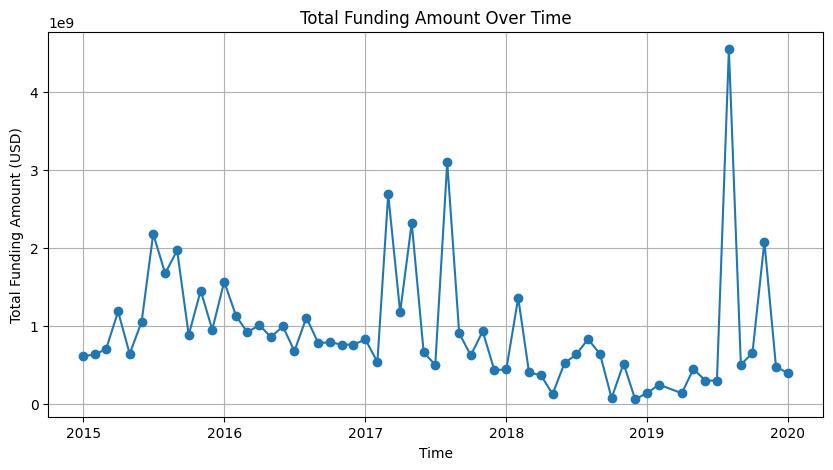

In [49]:
# Plot total funding amount over time
plt.figure(figsize=(10,5))
plt.plot(monthly_funding['year_month'], monthly_funding['total_funding'], marker='o', linestyle='-')
plt.title('Total Funding Amount Over Time')
plt.xlabel('Time')
plt.ylabel('Total Funding Amount (USD)')
plt.grid(True)
plt.show()

💡 Output: Histogram of Bike Share Distribution

Fluctuations: Noticeable fluctuations in total funding amounts between 2015 and 2020.

Peak: Peak funding amount was observed in 2019.

Low Activity: Low funding activity in late 2018 and early 2019.

*Does Location also play a role, In determining the Growth of a Startup?*

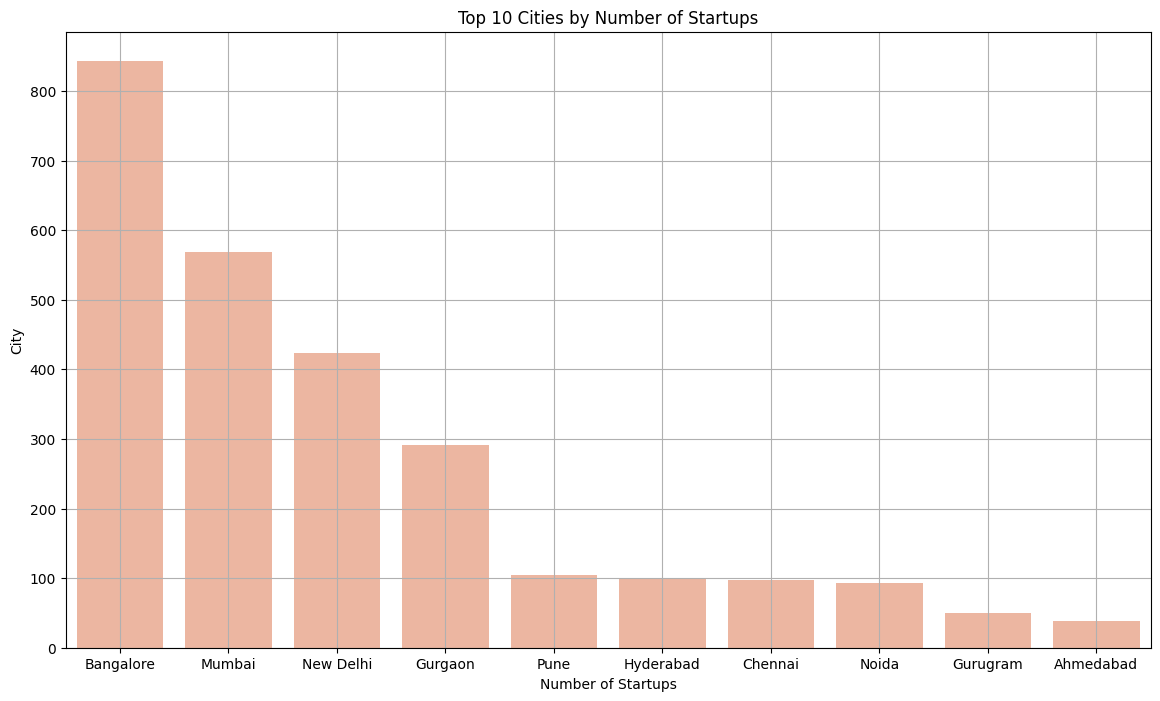

In [52]:
# Count the number of startups in each city
top_cities_count = startup['city_location'].value_counts().head(10).reset_index()
top_cities_count.columns = ['City', 'Count']

# Plot the number of startups by city
plt.figure(figsize=(14, 8))
sns.barplot(x='City', y='Count', data=top_cities_count, color='#F8B195')
plt.title('Top 10 Cities by Number of Startups')
plt.xlabel('Number of Startups')
plt.ylabel('City')
plt.grid(True)
plt.show()

*Who plays the main role in Indian Startups Ecosystem?*

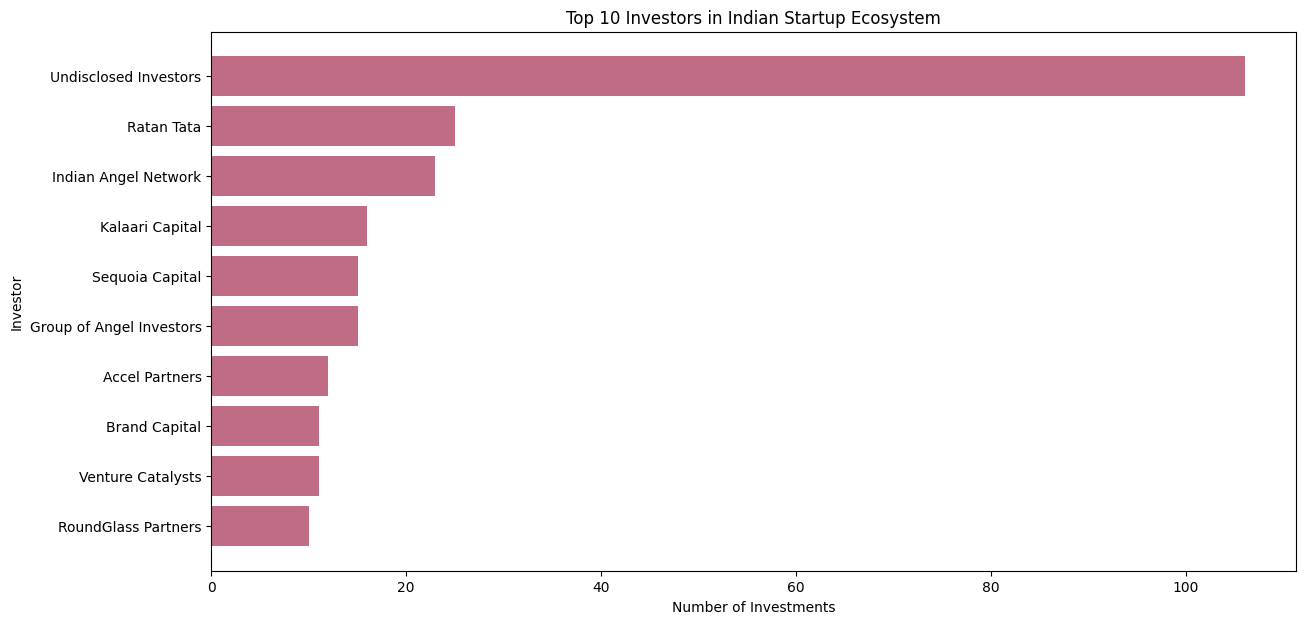

In [53]:
# Investor analysis
investor_funding = startup['undisclosed_investor'].value_counts().reset_index()
investor_funding.columns = ['Investor', 'Number of Investments']

# Top 10 most invested investors
top_investors = investor_funding.head(10)

plt.figure(figsize=(14, 7))
plt.barh(top_investors['Investor'],
         top_investors['Number of Investments'],
         color='#c06c84')
plt.xlabel('Number of Investments')
plt.ylabel('Investor')
plt.title('Top 10 Investors in Indian Startup Ecosystem')
plt.gca().invert_yaxis()
plt.show()

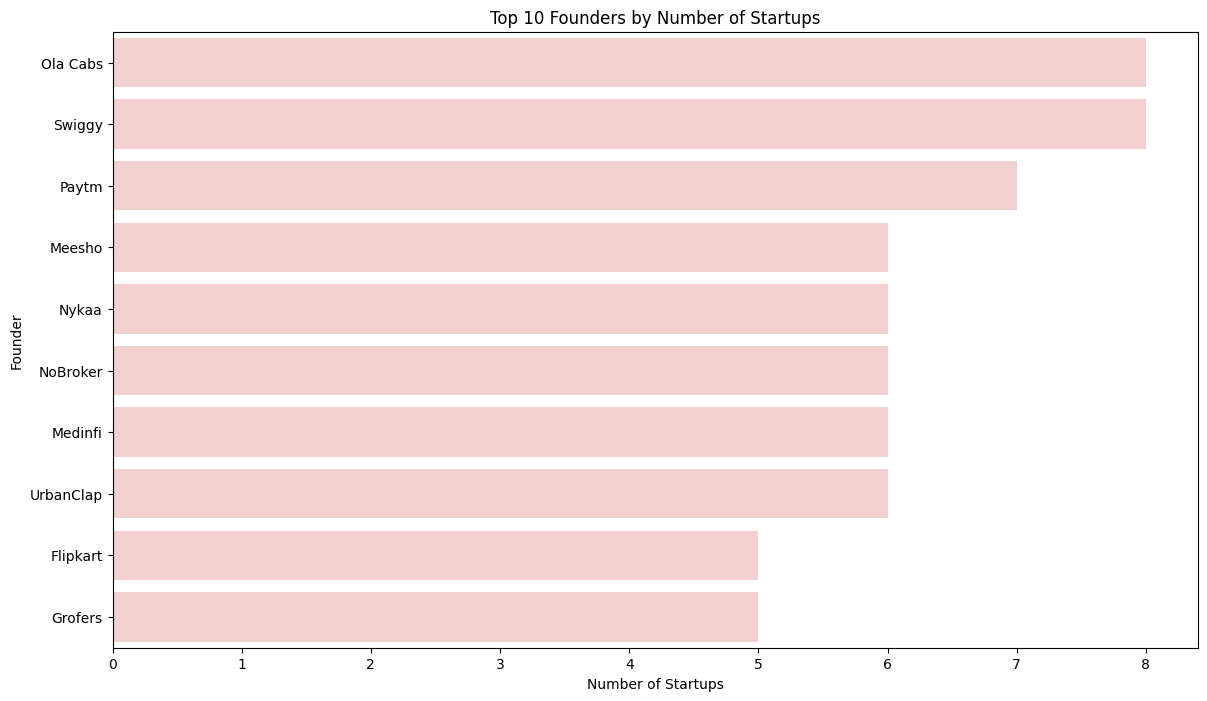

In [56]:
startup['Founders'] = startup['startup_name'].fillna('Unknown').str.split(',')

# Explode the list of founders into separate rows
founders_exploded = startup.explode('Founders')

# Count the number of startups for each founder and select the top 10
top_founders = founders_exploded['Founders'].value_counts().head(10).reset_index()
top_founders.columns = ['Founder', 'Number of Startups']

# Plot the top founders
plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Startups', y='Founder', data=top_founders, color='#F7CAC9')
plt.title('Top 10 Founders by Number of Startups')
plt.xlabel('Number of Startups')
plt.ylabel('Founder')
plt.show()

*Which Kind of Industries are more preferred for Startups?*

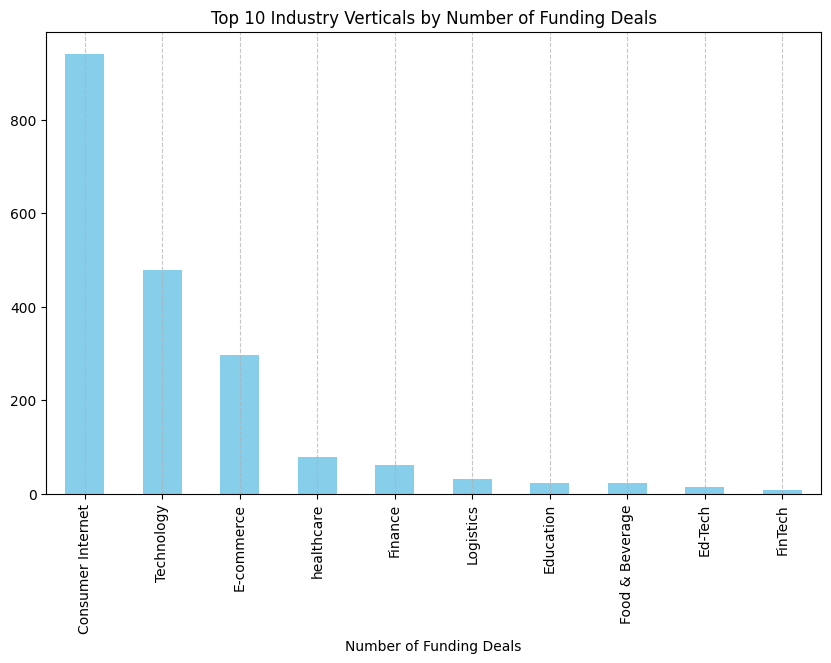

In [59]:
# Calculate the number of funding deals for each industry vertical and select the top 10
top_industry_verticals = startup['industry_vertical'].value_counts().nlargest(10).sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
top_industry_verticals.plot(kind='bar', color='skyblue')
plt.title('Top 10 Industry Verticals by Number of Funding Deals')
plt.xlabel('Number of Funding Deals')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Top Industries:

Consumer Internet: Leading with the highest number of funding rounds (589 rounds).

Technology: Second most active with 310 funding rounds.

E-commerce: Significant presence with 170 funding rounds.

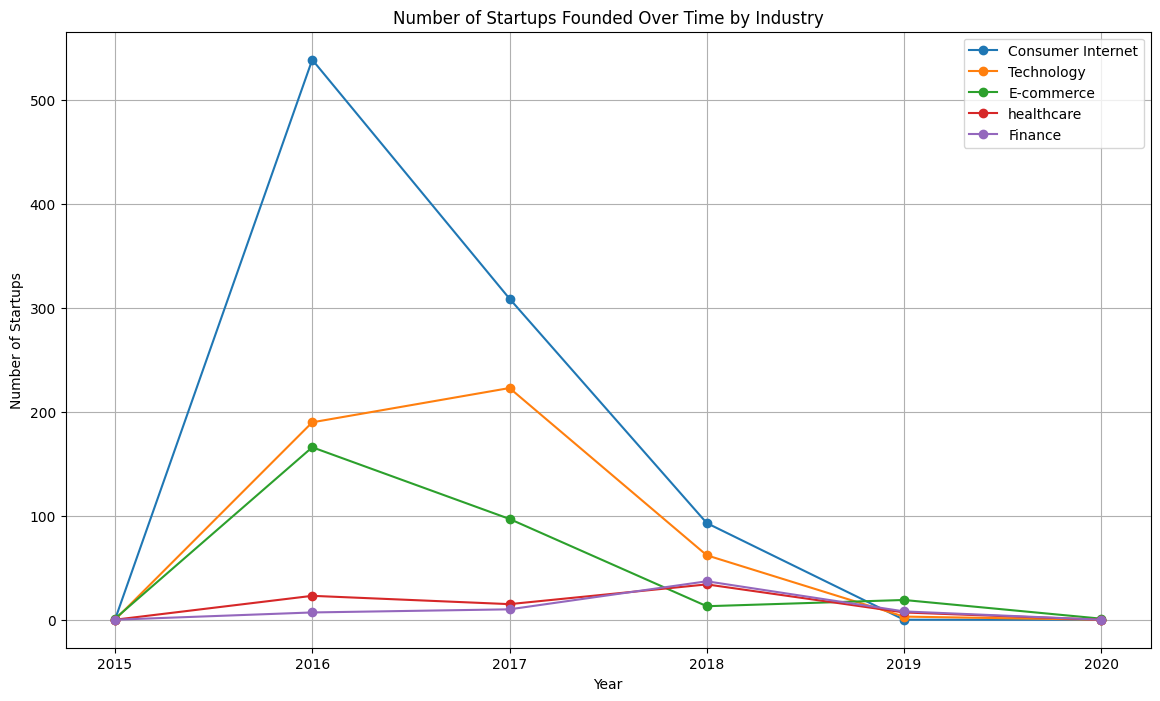

In [60]:

top_industries = startup[startup['industry_vertical'] != 'unknown']['industry_vertical'].value_counts().head(10).reset_index()

# Ensure 'date' column is in datetime format
startup['date'] = pd.to_datetime(startup['date'], format='%d/%m/%Y')

# Extract year and group by year and industry
startup['year'] = startup['date'].dt.year
yearly_industry_count = startup.groupby(['year', 'industry_vertical']).size().unstack().fillna(0)

# List of top industries
top_industries_list = top_industries['industry_vertical'].head(5)

# Plotting the line plots for top industries over time
plt.figure(figsize=(14, 8))
for industry in top_industries_list:
    plt.plot(yearly_industry_count.index, yearly_industry_count[industry], marker='o', label=industry)
plt.title('Number of Startups Founded Over Time by Industry')
plt.xlabel('Year')
plt.ylabel('Number of Startups')
plt.legend()
plt.grid(True)
plt.show()

*What is the General Amount that Startups get in India?*

In [61]:
# Preview of the details of the 10 most funded Initiatives

startup.sort_values(by = 'amount_USD', ascending = False).head(5)

,sr_No,date,startup_name,industry_vertical,sub_vertical,city_location,undisclosed_investor,investment_type,amount_USD,year,month,Founders
60,61,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bangalore,Westbridge Capital,Series B,"3,900,000,000.00",2019,8,[Rapido Bike Taxi]
651,652,2017-08-11,Flipkart,E-commerce,Online Marketplace,Bangalore,Softbank,Private Equity,"2,500,000,000.00",2017,8,[Flipkart]
966,967,2017-03-21,Flipkart,E-commerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,"1,400,000,000.00",2017,3,[Flipkart]
830,831,2017-05-18,Paytm,E-commerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,"1,400,000,000.00",2017,5,[Paytm]
31,32,2019-11-25,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,"1,000,000,000.00",2019,11,[Paytm]


In [63]:
# Calculating the average funding received by a startup

startup['amount_USD'].mean()

18429897.27080872

In [71]:
# Preview of the Top 10 Most Funded Initiatives
startup.sort_values(by = 'amount_USD', ascending=False).head(10)

,sr_No,date,startup_name,industry_vertical,sub_vertical,city_location,undisclosed_investor,investment_type,amount_USD,year,month,Founders
60,61,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bangalore,Westbridge Capital,Series B,"3,900,000,000.00",2019,8,[Rapido Bike Taxi]
651,652,2017-08-11,Flipkart,E-commerce,Online Marketplace,Bangalore,Softbank,Private Equity,"2,500,000,000.00",2017,8,[Flipkart]
966,967,2017-03-21,Flipkart,E-commerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,"1,400,000,000.00",2017,3,[Flipkart]
830,831,2017-05-18,Paytm,E-commerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,"1,400,000,000.00",2017,5,[Paytm]
31,32,2019-11-25,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,"1,000,000,000.00",2019,11,[Paytm]
2648,2649,2015-07-28,Flipkart.com,Online Marketplace,NaN,Bangalore,Steadview Capital and existing investors,Private Equity,"700,000,000.00",2015,7,[Flipkart.com]
2459,2460,2015-09-29,Paytm,E-commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,"680,000,000.00",2015,9,[Paytm]
188,189,2018-08-30,True North,Finance,Private Equity Firm,Mumbai,NaN,Private Equity,"600,000,000.00",2018,8,[True North]
33,34,2019-10-02,Udaan,B2B,Business development,Bangalore,"Altimeter Capital, DST Global",Series D,"585,000,000.00",2019,10,[Udaan]
2244,2245,2015-11-18,Ola,Car Aggregator & Retail Mobile App,NaN,Bangalore,"Baillie Gifford, Falcon Edge Capital, Tiger Gl...",Private Equity,"500,000,000.00",2015,11,[Ola]


In [72]:
# Preview of the least funded initiatives
startup.sort_values(by = 'amount_USD').head(10)

,sr_No,date,startup_name,industry_vertical,sub_vertical,city_location,undisclosed_investor,investment_type,amount_USD,year,month,Founders
3020,3021,2015-01-19,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,"16,000.00",2015,1,[Enabli]
3021,3022,2015-01-19,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,"16,000.00",2015,1,[CBS]
3019,3020,2015-01-19,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,"16,000.00",2015,1,[Yo Grad]
3018,3019,2015-01-19,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,"16,000.00",2015,1,[Play your sport]
3017,3018,2015-01-19,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,"16,000.00",2015,1,[Hostel Dunia]
2933,2934,2015-02-02,Faaya,NaN,NaN,NaN,Group of Angel Investors,Seed\\nFunding,"16,600.00",2015,2,[Faaya]
2934,2935,2015-02-02,InstaBounce,NaN,NaN,NaN,Group of Angel Investors,Seed\\nFunding,"16,600.00",2015,2,[InstaBounce]
2935,2936,2015-02-02,Chloroplast Foods,NaN,NaN,NaN,Group of Angel Investors,Seed\\nFunding,"16,600.00",2015,2,[Chloroplast Foods]
2936,2937,2015-02-02,Dealwithus,NaN,NaN,NaN,Group of Angel Investors,Seed\\nFunding,"16,600.00",2015,2,[Dealwithus]
2937,2938,2015-02-02,CleverSharks,NaN,NaN,NaN,Group of Angel Investors,Seed\\nFunding,"16,600.00",2015,2,[CleverSharks]


`Top 10 fund rais company`

In [78]:
top10_fund_raise=startup.groupby('startup_name')['amount_USD'].sum().sort_values(ascending=False).head(10).reset_index()

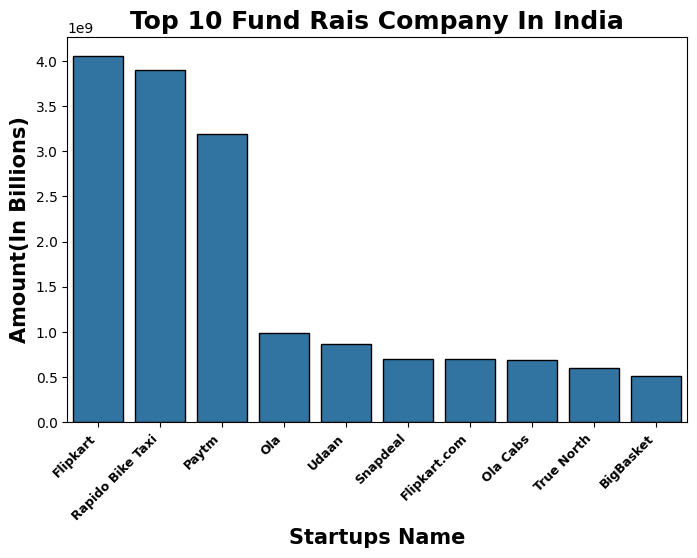

In [79]:
plt.figure(figsize=(8,5))
sns.barplot(x='startup_name',y='amount_USD',data=top10_fund_raise,edgecolor='black')
plt.title('Top 10 Fund Rais Company In India',fontsize=18,weight='bold')
plt.xlabel('Startups Name',fontsize=15,weight='bold')
plt.ylabel('Amount(In Billions)',fontsize=15,weight='bold')
plt.xticks(rotation=45,ha='right',fontsize=9,weight='bold')
plt.show()

`Top 5 investors in india`

In [85]:
startup['undisclosed_investor']=startup['undisclosed_investor'].str.replace('Softbank','SoftBank Group')

In [86]:
Top_5_startupinvestor_inIndia=startup.groupby('undisclosed_investor')['amount_USD'].sum().reset_index().sort_values(by='amount_USD',ascending=False).head(5)

In [87]:
Top_5_startupinvestor_inIndia

,undisclosed_investor,amount_USD
1940,SoftBank Group,"3,962,000,000.00"
2317,Westbridge Capital,"3,900,000,000.00"
1292,"Microsoft, eBay, Tencent Holdings","1,400,000,000.00"
2267,Vijay Shekhar Sharma,"1,037,009,794.54"
2167,Undisclosed Investors,"717,920,048.15"


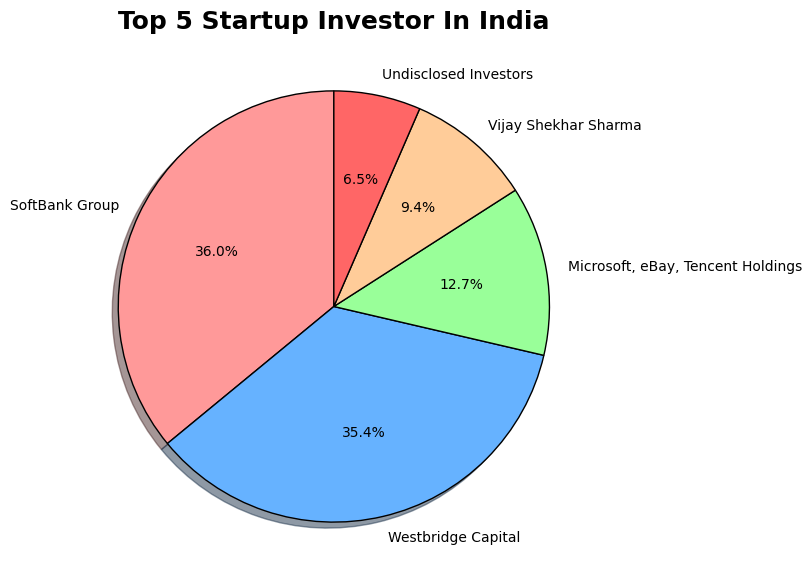

In [90]:
plt.figure(figsize=(7,7))
plt.pie(Top_5_startupinvestor_inIndia['amount_USD'], labels=Top_5_startupinvestor_inIndia['undisclosed_investor'], autopct='%1.1f%%', startangle=90,
        colors= ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF6666'],shadow=True, wedgeprops={'edgecolor': 'black'})

plt.title('Top 5 Startup Investor In India', fontsize=18, weight='bold')

plt.show()

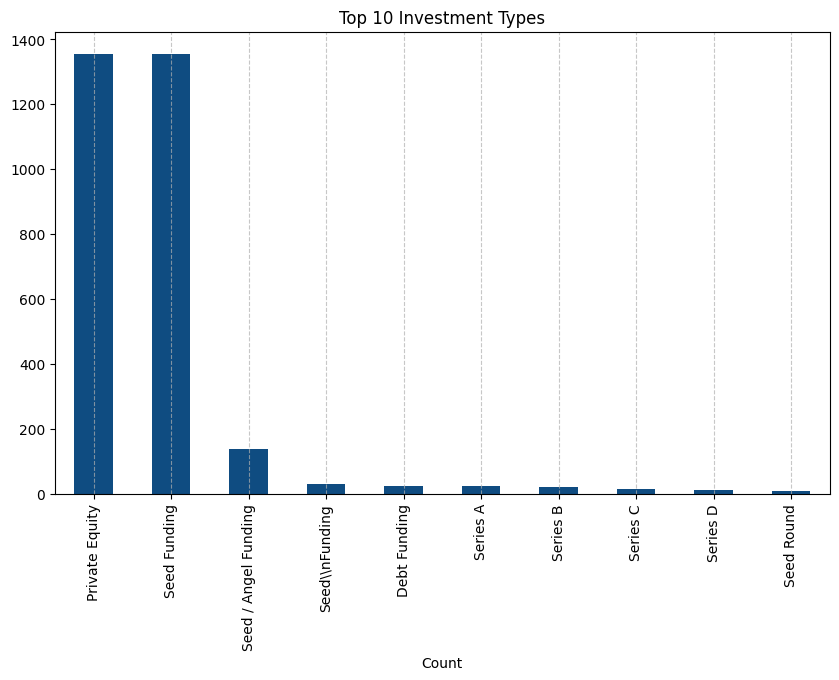

In [93]:
# Calculate the count of each investment type and select the top 10

top_investment_types = startup['investment_type'].value_counts().head(10).sort_values(ascending=False)


plt.figure(figsize=(10, 6))
top_investment_types.plot(kind='bar', color='#0F4C81')
plt.title('Top 10 Investment Types')
plt.xlabel('Count')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Private Equity: Most Common Funding Type: Private Equity is the most common funding type, with nearly 1,400 instances. This indicates that many startups in the dataset have reached a level of maturity where they can attract significant private equity investments.

---

### **Conclusions**  

#### **Key Findings:**  

**Funding Trends Over Time:**  
- The data highlights a clear pattern in the funding received by startups across different years.  
- Certain periods experienced notable surges in funding, reflecting increased investor enthusiasm and economic expansion.  

**General Funding Amounts:**  
- A broad spectrum of funding amounts was observed, with some startups securing significant investments.  
- Most startups received funding within specific ranges, indicating common investment thresholds.  

**Industry Preferences:**  
- Sectors such as Technology, E-Commerce, Healthcare, and Finance consistently attracted the highest funding.  
- This trend suggests strong investor confidence in these industries due to their growth potential and market demand.  

**Geographical Influence:**  
- Bangalore, Mumbai, and New Delhi emerged as key cities for startup funding.  
- These locations offer a favorable ecosystem with better infrastructure, investor access, and entrepreneurial support.  

**Key Players in the Ecosystem:**  
- The analysis identified top investors who play a crucial role in supporting startups.  
- These investors contribute not just financially but also through mentorship and networking opportunities.  

**Types of Funding:**  
- Various funding stages, including Seed Funding, Series A, and Series B, were identified.  
- Each stage serves a distinct purpose, ranging from early-stage product development to scaling and market expansion.  

#### **Recommendations:**  

**For Startups:**  
- **Target High-Growth Industries:** Startups should explore sectors like Technology, E-Commerce, and Healthcare, which attract significant investor interest.  
- **Capitalize on Geographical Advantages:** Establishing operations in startup-friendly cities such as Bangalore, Mumbai, and New Delhi can improve access to funding and resources.  
- **Diversify Funding Strategies:** Engaging with multiple investors and exploring various funding sources can help secure capital at different growth stages.  

**For Investors:**  
- **Spot Emerging Sectors:** Keeping track of evolving market trends can help identify new industries with high growth prospects.  
- **Enhance Ecosystem Development:** Investing in infrastructure and support systems in emerging startup hubs can foster innovation and long-term growth.  

The analysis of startup funding patterns offers valuable insights into the Indian startup ecosystem. Understanding these trends enables stakeholders to make informed decisions, fostering innovation and sustainable growth in this dynamic sector.